In [39]:
import pandas as pd

In [40]:
tenis_df = pd.read_csv("dane/gotowe_dane.csv", sep=';')

In [41]:
print(tenis_df.shape[0])

73247


In [42]:
X = tenis_df.drop(columns=['label'])
y = tenis_df['label']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Inicjalizacja modelu
model_lr = LogisticRegression(max_iter=100)

# Trenowanie modelu na zbiorze treningowym
model_lr.fit(X_train, y_train)

# Predykcja na danych testowych
y_pred = model_lr.predict(X_test)

# Ocena dokładności
accuracy = accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy:.2f}')


Dokładność modelu: 0.66


C:\Users\stani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print(f'Dokładność XGBoost: {accuracy_score(y_test, y_pred_xgb):.2f}')

Dokładność XGBoost: 0.73


In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print(f'Dokładność Random Forest: {accuracy_score(y_test, y_pred_rf):.2f}')
feature_importances = model_rf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(20))

Dokładność Random Forest: 0.73
                    Feature  Importance
13      player0_rank_points    0.067248
11      player1_rank_points    0.062483
10             player1_rank    0.059921
12             player0_rank    0.057085
51                 is_upset    0.045732
9                   minutes    0.027997
6               player0_age    0.027130
3               player1_age    0.026783
31  player0_rolling_bpFaced    0.026573
22  player1_rolling_bpFaced    0.026275
4                player0_id    0.026058
1                player1_id    0.025684
23      player0_rolling_ace    0.024937
14      player1_rolling_ace    0.024922
28   player0_rolling_2ndWon    0.024345
15       player1_rolling_df    0.024110
27   player0_rolling_1stWon    0.024106
24       player0_rolling_df    0.024087
19   player1_rolling_2ndWon    0.024029
18   player1_rolling_1stWon    0.023892


In [47]:
model = model_rf
accuracy = accuracy_score(y_test, y_pred_rf)

In [48]:
# Predykcja na zbiorze treningowym
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Dokładność na zbiorze treningowym: {train_accuracy:.2f}')
print(f'Dokładność na zbiorze testowym: {accuracy:.2f}')

Dokładność na zbiorze treningowym: 1.00
Dokładność na zbiorze testowym: 0.73


In [ ]:
from sklearn.model_selection import cross_val_score

# Walidacja krzyżowa (np. 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Dokładność walidacji krzyżowej: {cv_scores.mean():.2f} (± {cv_scores.std():.2f})')

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Raport klasyfikacji
print(classification_report(y_test, y_pred))

# Macierz pomyłek
print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     44008
           1       0.66      0.66      0.66     43825

    accuracy                           0.66     87833
   macro avg       0.66      0.66      0.66     87833
weighted avg       0.66      0.66      0.66     87833

Macierz pomyłek:
[[28988 15020]
 [14845 28980]]


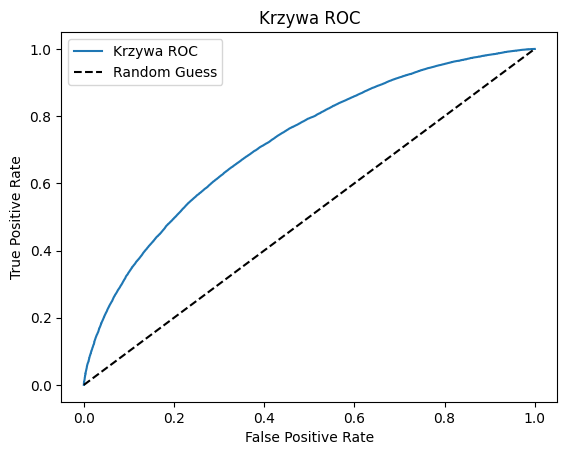

AUC-ROC: 0.72


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predykcja prawdopodobieństw
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Obliczenie krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Wykres krzywej ROC
plt.figure()
plt.plot(fpr, tpr, label='Krzywa ROC')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend()
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc:.2f}')

In [10]:
print(y.value_counts(), 'y._value_counts()')

label
0    146388
1    146388
Name: count, dtype: int64 y._value_counts()


In [12]:
y_train_pred_rf = model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Dokładność Random Forest na zbiorze treningowym: {train_accuracy_rf:.2f}')

Dokładność Random Forest na zbiorze treningowym: 1.00


In [13]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='accuracy')
print(f'Dokładność walidacji krzyżowej (Random Forest): {cv_scores_rf.mean():.2f} (± {cv_scores_rf.std():.2f})')

Dokładność walidacji krzyżowej (Random Forest): 0.74 (± 0.02)
